In [1]:
# Importing the librairies

import pandas as pd
from pmdarima import auto_arima
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
# loading the dataset

df = pd.read_csv('/home/exalis/GitHub/velib-prediction/velib-prediction/3. Modeling Research/datasets/international-airline-passengers.csv', sep =";")

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


/home/exalis/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


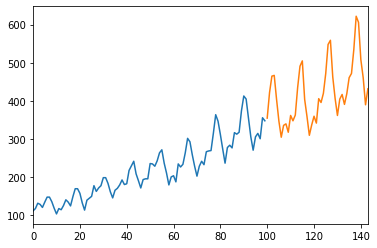

In [6]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
test = df[int(0.7*(len(df))):]

#preprocessing (since arima takes univariate series as input)
train_viz = train
test_viz = test

train_viz.drop('Month',axis=1,inplace=True)
test_viz.drop('Month',axis=1,inplace=True)

#plotting the data
train_viz['Passengers'].plot()
test_viz['Passengers'].plot()

In [7]:
# Initializing, training and fitting the model

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

# Creating forecast data

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=886.147, BIC=901.718, Fit time=0.477 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=909.769, BIC=914.959, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=907.370, BIC=915.155, Fit time=0.073 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=904.979, BIC=912.764, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=908.785, BIC=911.380, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=884.966, BIC=897.942, Fit time=0.324 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=884.152, BIC=897.128, Fit time=0.302 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root 

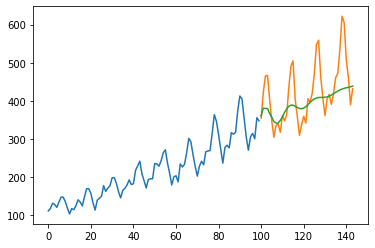

In [8]:
# Plotting the predictions vs test data

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [9]:
# Calculating the RMSE for metrics

rmse = sqrt(mean_squared_error(test,forecast))
print(rmse)

67.43792820231941
